# PROYECTO DATOS MASIVOS

Elaborado por: Lidia Moreno Marín y Amparo Gálvez Vilar

#  PRÁCTICA 4: MapReduce

In [18]:
filename = 'clean_data.csv'
import csv

## Relación entre tamaño en metros cuadrados y necesidad de reformas

In [19]:
class MapperSizeVsRenovation:
    def map(self, data):
        results = []
        for row in data:
            sq_m_built = float(row["sq_m_built"])
            needs_renovating = row["needs_renovating"] == "True"
            results.append((needs_renovating, sq_m_built))
        return results

class ReducerSizeVsRenovation:
    def reduce(self, tuples):
        results = {}
        for key, value in tuples:
            if key not in results:
                results[key] = []
            results[key].append(value)
        return results

class JobRunner:
    def run(self, filename, mapper_class, reducer_class):
        # Leer datos del CSV
        with open(filename, mode='r') as file:
            csv_reader = csv.DictReader(file)
            data = [row for row in csv_reader]

        # Mapper
        mapper = mapper_class()
        mapped_tuples = mapper.map(data)

        # Reducer
        reducer = reducer_class()
        reduced_output = reducer.reduce(mapped_tuples)

        return reduced_output

In [20]:
runner = JobRunner()
print("\nRelación entre tamaño y necesidad de reformas:")
results = runner.run(filename, MapperSizeVsRenovation, ReducerSizeVsRenovation)

avg_true = sum(results[True]) / len(results[True]) if True in results else 0
avg_false = sum(results[False]) / len(results[False]) if False in results else 0

print(f"Promedio de tamaño para propiedades que necesitan reformas: {avg_true:.2f} m²")
print(f"Promedio de tamaño para propiedades que NO necesitan reformas: {avg_false:.2f} m²")


Relación entre tamaño y necesidad de reformas:
Promedio de tamaño para propiedades que necesitan reformas: 118.10 m²
Promedio de tamaño para propiedades que NO necesitan reformas: 110.82 m²


## Promedio de precios de propiedades que necesitan reformas

In [21]:
class MapperAveragePriceRenovation:
    def map(self, data):
        results = []
        for row in data:
            if row["needs_renovating"] == "True":
                price = float(row["price"])
                results.append(("needs_renovating", price))
        return results

class ReducerAveragePriceRenovation:
    def reduce(self, tuples):
        total_price = 0
        count = 0
        for key, value in tuples:
            total_price += value
            count += 1
        return {"average_price": total_price / count if count > 0 else 0}

class JobRunner:
    def run(self, filename, mapper_class, reducer_class):
        # Leer datos del CSV
        with open(filename, mode='r') as file:
            csv_reader = csv.DictReader(file)
            data = [row for row in csv_reader]

        # Mapper
        mapper = mapper_class()
        mapped_tuples = mapper.map(data)

        # Reducer
        reducer = reducer_class()
        reduced_output = reducer.reduce(mapped_tuples)

        return reduced_output

In [22]:
print("\nPromedio de precios de propiedades que necesitan reformas:")
runner.run(filename, MapperAveragePriceRenovation, ReducerAveragePriceRenovation)


Promedio de precios de propiedades que necesitan reformas:


{'average_price': 479774.3447488584}

## Distribución de propiedades que necesitan reformas por ciudad

In [23]:
class MapperDistributionByCity:
    def map(self, data):
        results = []
        for row in data:
            if row["needs_renovating"] == "True":
                city = row["city"]
                results.append((city, 1))
        return results

class ReducerDistributionByCity:
    def reduce(self, tuples):
        results = {}
        for city, count in tuples:
            results[city] = results.get(city, 0) + count
        return results

class JobRunner:
    def run(self, filename, mapper_class, reducer_class):
        # Leer datos del CSV
        with open(filename, mode='r') as file:
            csv_reader = csv.DictReader(file)
            data = [row for row in csv_reader]

        # Mapper
        mapper = mapper_class()
        mapped_tuples = mapper.map(data)

        # Reducer
        reducer = reducer_class()
        reduced_output = reducer.reduce(mapped_tuples)

        return reduced_output

In [24]:
print("\nDistribución por ciudad:")
runner.run(filename, MapperDistributionByCity, ReducerDistributionByCity)


Distribución por ciudad:


{'Barcelona': 1063,
 'Santa Coloma de Gramenet': 59,
 'Hospitalet de Llobregat': 107,
 'Badalona': 84,
 'Sant Adriá de Besós': 1}

## Relación entre el número de dormitorios y necesidad de reformas

In [25]:
class MapperBedroomsVsRenovation:
    def map(self, data):
        results = []
        for row in data:
            n_bedrooms = int(row["n_bedrooms"])
            needs_renovating = row["needs_renovating"] == "True"
            results.append((needs_renovating, n_bedrooms))
        return results

class ReducerBedroomsVsRenovation:
    def reduce(self, tuples):
        results = {}
        for key, value in tuples:
            if key not in results:
                results[key] = []
            results[key].append(value)
        return results

class JobRunner:
    def run(self, filename, mapper_class, reducer_class):
        # Leer datos del CSV
        with open(filename, mode='r') as file:
            csv_reader = csv.DictReader(file)
            data = [row for row in csv_reader]

        # Mapper
        mapper = mapper_class()
        mapped_tuples = mapper.map(data)

        # Reducer
        reducer = reducer_class()
        reduced_output = reducer.reduce(mapped_tuples)

        return reduced_output

In [26]:
print("\nRelación entre dormitorios y necesidad de reformas:")
results = runner.run(filename, MapperBedroomsVsRenovation, ReducerBedroomsVsRenovation)

import math
avg_true = math.floor(sum(results[True]) / len(results[True])) if True in results else 0
avg_false = math.floor(sum(results[False]) / len(results[False])) if False in results else 0

print(f"Promedio de habitaciones para propiedades que necesitan reformas: {avg_true:.2f} ")
print(f"Promedio de habitaciones para propiedades que NO necesitan reformas: {avg_false:.2f} ")


Relación entre dormitorios y necesidad de reformas:
Promedio de habitaciones para propiedades que necesitan reformas: 3.00 
Promedio de habitaciones para propiedades que NO necesitan reformas: 2.00 


## Propiedades con mayor antigüedad que necesitan reformas

In [27]:
class MapperOldestRenovation:
    def map(self, data):
        results = []
        for row in data:
            # Change this line to handle decimals
            year_built = int(float(row["year_built"]))
            needs_renovating = row["needs_renovating"] == "True"
            if needs_renovating:
                age = 2024 - year_built
                results.append((row["id"], age))
        return results

class ReducerOldestRenovation:
    def reduce(self, tuples):
        results = sorted(tuples, key=lambda x: x[1], reverse=True)
        return results

class JobRunner:
    def run(self, filename, mapper_class, reducer_class):
        # Leer datos del CSV
        with open(filename, mode='r') as file:
            csv_reader = csv.DictReader(file)
            data = [row for row in csv_reader]

        # Mapper
        mapper = mapper_class()
        mapped_tuples = mapper.map(data)

        # Reducer
        reducer = reducer_class()
        reduced_output = reducer.reduce(mapped_tuples)

        return reduced_output

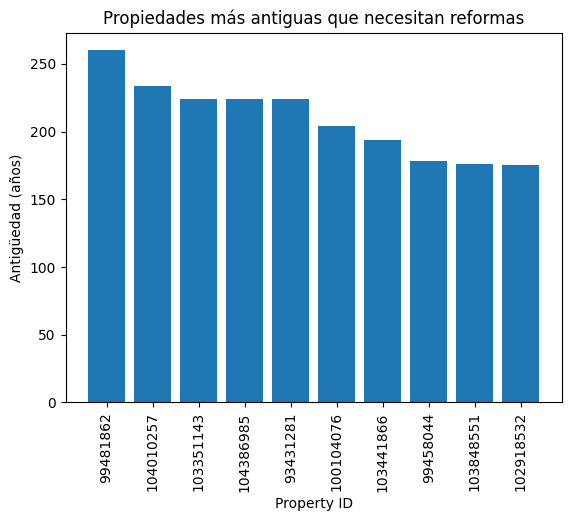

In [28]:
results = runner.run(data, MapperOldestRenovation, ReducerOldestRenovation)

import matplotlib.pyplot as plt

ids, years = zip(*results)  # Divide ids y antigüedades
plt.bar(ids[:10], years[:10])  # Mostrar las 10 propiedades más antiguas
plt.xlabel("Property ID")
plt.ylabel("Antigüedad (años)")
plt.title("Propiedades más antiguas que necesitan reformas")
plt.xticks(rotation=90)
plt.show()


## Promedio de antigüedad de propiedades que necesitan reformas por barrio

In [29]:
class MapperAverageAgeByNeighborhood:
    def map(self, data):
        results = []
        for row in data:
            if row["needs_renovating"] == "True":
                neighborhood = row["neighborhood"]
                year_built = int(float(row["year_built"]))
                age = 2024 - year_built
                results.append((neighborhood, age))
        return results

class ReducerAverageAgeByNeighborhood:
    def reduce(self, tuples):
        results = {}
        for neighborhood, age in tuples:
            if neighborhood not in results:
                results[neighborhood] = []
            results[neighborhood].append(age)
        return {k: sum(v) / len(v) for k, v in results.items()}

class JobRunner:
    def run(self, filename, mapper_class, reducer_class):
        # Leer datos del CSV
        with open(filename, mode='r') as file:
            csv_reader = csv.DictReader(file)
            data = [row for row in csv_reader]

        # Mapper
        mapper = mapper_class()
        mapped_tuples = mapper.map(data)

        # Reducer
        reducer = reducer_class()
        reduced_output = reducer.reduce(mapped_tuples)

        return reduced_output

In [30]:
print("\nPromedio de antigüedad por barrio:")
runner.run(filename, MapperAverageAgeByNeighborhood, ReducerAverageAgeByNeighborhood)


Promedio de antigüedad por barrio:


{'El Raval': 129.80281690140845,
 'El Gòtic': 134.55555555555554,
 'Ciutat Vella': 129.64705882352942,
 'Horta Guinardó': 60.375,
 'Sant Pere - Santa Caterina i la Ribera': 115.37037037037037,
 'Can Peguera - El Turó de la Peira': 67.33333333333333,
 'La Sagrada Família': 70.70833333333333,
 'El Carmel': 62.583333333333336,
 "La Dreta de l'Eixample": 100.1875,
 "La Nova Esquerra de l'Eixample": 83.08333333333333,
 'Sant Antoni': 74.88888888888889,
 'El Poble Sec - Parc de Montjuïc': 85.83333333333333,
 'Vila de Gràcia': 68.2,
 'Gràcia': 65.5625,
 'Sarrià-Sant Gervasi': 56.4,
 'El Guinardó': 59.11764705882353,
 'Canyelles': 49.333333333333336,
 'Singuerlín': 58.42857142857143,
 'Fondo': 57.57142857142857,
 'Centre': 54.23529411764706,
 'Sant Gervasi - La Bonanova': 69.05882352941177,
 'Hostafrancs': 93.8,
 'Pedralbes': 57.2,
 'Les Corts': 67.03448275862068,
 'El Poblenou': 51.22222222222222,
 'Sant Gervasi - Galvany': 63.7037037037037,
 'Sants - Badal': 62.69230769230769,
 'Collblanc': 

# PRÁCTICA 5: RDDs

In [31]:
from pyspark import SparkContext
sc = SparkContext('local', 'test')

In [32]:
# Leer el archivo CSV
rdd_csv = sc.textFile("clean_data.csv")

# Función para procesar cada línea del archivo CSV
def take_elem_csv(csv_line):
    lst = csv_line.split(',')
    return lst

# Extraer encabezados
header = rdd_csv.first()
rdd_data = rdd_csv.filter(lambda line: line != header).map(take_elem_csv)

## Distribución de tipos de propiedades

In [33]:
property_type_count = rdd_data.map(lambda x: x[1]).map(lambda p: (p, 1)).reduceByKey(lambda a, b: a + b).collect()
print("Distribución de tipos de propiedades:")
for property_type, count in property_type_count:
    print(f"{property_type}: {count}")

Distribución de tipos de propiedades:
Flat / apartment: 8272
Studio flat: 153
Penthouse: 706
Duplex: 453
House: 55
Semi-detached house: 69
Terraced house: 158
Detached house: 233
Estate: 4
Village house: 2
Tower: 1


## Contar las propiedades por ciudad que necesitan reformas

In [34]:
needs_renovating_city_count = (
    rdd_data.filter(lambda x: x[16] == "True")
    .map(lambda x: x[4])
    .map(lambda c: (c, 1))
    .reduceByKey(lambda a, b: a + b)
    .collect()
)

print("\nNúmero de propiedades que necesitan reformas por ciudad:")
for city, count in needs_renovating_city_count:
    print(f"{city}: {count}")


Número de propiedades que necesitan reformas por ciudad:
El Raval: 95
Barcelona: 951
Ciutat Vella: 30
El Gòtic: 40
La Barceloneta: 14
La Verneda i la Pau: 9
Sant Pere - Santa Caterina i la Ribera: 42
Nou Barris: 29
La Vila Olímpica del Poblenou: 3
Horta Guinardó: 14
El Carmel: 11
La Dreta de l'Eixample: 63
Eixample: 11
La Nova Esquerra de l'Eixample: 24
La Sagrera: 3
L'Antiga Esquerra de l'Eixample: 12
Sant Antoni: 13
Porta: 9
Vila de Gràcia: 16
El Guinardó: 25
Sant Martí de Provençals: 5
La Marina del Port: 22
Sants-Montjuïc: 18
Santa Coloma de Gramenet: 90
Pedralbes: 18
El Poblenou: 15
Sant Gervasi - Galvany: 31
Sant Andreu: 32
Hospitalet de Llobregat: 96
La Florida: 7
Santa Eulàlia: 9
La Florida - Les Planes: 27
Can Serra - Pubilla Cases: 19
Sanfeliu: 2
La Teixonera: 14
Puigfred: 4
Bufalà: 5
Remei: 2
Badalona: 77
Progrés-Pep Ventura: 8
Llefià - Sant Roc - Artigues: 16
La Maternitat i Sant Ramon: 12
Les Corts: 34
El Camp de l'Arpa del Clot: 21
Ciutat Meridiana - Torre Baró - Vallbon

## Promedio de precios por tipo de propiedad

In [35]:
average_price_by_type = (
    rdd_data.map(lambda x: (x[1], (float(x[5]) if x[5].replace('.', '', 1).isdigit() else 0, 1)))
    .reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))
    .map(lambda x: (x[0], x[1][0] / x[1][1] if x[1][1] != 0 else 0))
    .collect()
)

print("\nPromedio de precios por tipo de propiedad:")
for property_type, avg_price in average_price_by_type:
    print(f"{property_type}: {avg_price:.2f}€")


Promedio de precios por tipo de propiedad:
Flat / apartment: 392575.16€
Studio flat: 173084.97€
Penthouse: 605500.13€
Duplex: 543104.98€
House: 1487363.45€
Semi-detached house: 783897.10€
Terraced house: 826044.87€
Detached house: 1659904.59€
Estate: 4848500.00€
Village house: 337500.00€
Tower: 1180000.00€


## Porcentaje de propiedades que necesitan reforma por tipo de propiedad

In [36]:
# Paso 1: Contar las propiedades por tipo de propiedad
property_type_count = rdd_data.map(lambda x: x[1]).map(lambda p: (p, 1)).reduceByKey(lambda a, b: a + b)

# Paso 2: Contar las propiedades por tipo de propiedad que necesitan reformas
needs_renovating_count = rdd_data.filter(lambda x: x[16] == "True").map(lambda x: x[1]).map(lambda p: (p, 1)).reduceByKey(lambda a, b: a + b)

# Paso 3: Unir los dos RDDs por tipo de propiedad
property_type_with_renovations = property_type_count.join(needs_renovating_count)

# Paso 4: Calcular el porcentaje de propiedades que necesitan reformas por tipo de propiedad
property_type_percentage = property_type_with_renovations.map(lambda x: (x[0], (x[1][1] / x[1][0]) * 100)).collect()

# Mostrar los resultados
print("Porcentaje de propiedades que necesitan reforma por tipo de propiedad:")
for property_type, percentage in property_type_percentage:
    print(f"{property_type}: {percentage:.2f}%")


Porcentaje de propiedades que necesitan reforma por tipo de propiedad:
Flat / apartment: 24.42%
Studio flat: 22.88%
Penthouse: 24.22%
Duplex: 19.43%
House: 29.09%
Semi-detached house: 39.13%
Terraced house: 24.05%
Detached house: 26.61%
Village house: 50.00%


## Relación entre el número de dormitorios y si necesita reformas

In [37]:
bedrooms_needs_renovating = (
    rdd_data.filter(lambda x: x[16] == "True")
    .map(lambda x: (int(float(x[7])) if x[7].replace('.', '', 1).isdigit() else 0, 1))
    .reduceByKey(lambda a, b: a + b)
    .collect()
)

print("\nNúmero de propiedades que necesitan reformas por número de dormitorios:")
for bedrooms, count in bedrooms_needs_renovating:
    print(f"{bedrooms} dormitorios: {count} propiedades con necesidad de reforma")


Número de propiedades que necesitan reformas por número de dormitorios:
80 dormitorios: 30 propiedades con necesidad de reforma
2 dormitorios: 240 propiedades con necesidad de reforma
35 dormitorios: 11 propiedades con necesidad de reforma
49 dormitorios: 13 propiedades con necesidad de reforma
57 dormitorios: 17 propiedades con necesidad de reforma
51 dormitorios: 9 propiedades con necesidad de reforma
5 dormitorios: 113 propiedades con necesidad de reforma
6 dormitorios: 41 propiedades con necesidad de reforma
90 dormitorios: 15 propiedades con necesidad de reforma
55 dormitorios: 32 propiedades con necesidad de reforma
34 dormitorios: 3 propiedades con necesidad de reforma
1 dormitorios: 73 propiedades con necesidad de reforma
3 dormitorios: 451 propiedades con necesidad de reforma
82 dormitorios: 12 propiedades con necesidad de reforma
72 dormitorios: 15 propiedades con necesidad de reforma
4 dormitorios: 206 propiedades con necesidad de reforma
42 dormitorios: 14 propiedades con 

## Promedio del año de construcción por tipo de propiedad

In [38]:
from math import sqrt

# Paso 1: Transformar los datos en un formato clave-valor basado en "year_built"
year_price_rdd = rdd_data.map(lambda x: (x[10], x[5]))

# Paso 2: Filtrar las filas que tienen un precio válido
filtered_year_price_rdd = year_price_rdd.filter(lambda x: x[1].replace('.', '', 1).isdigit())

# Paso 3: Convertir el precio a float después del filtrado
final_year_price_rdd = filtered_year_price_rdd.map(lambda x: (x[0], float(x[1])))


# Paso 4: Calcular suma, suma de cuadrados y conteo por año
stats_per_year = (
    final_year_price_rdd
    .mapValues(lambda price: (price, price**2, 1))
    .reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1], a[2] + b[2]))
)

# Paso 5: Calcular media y desviación estándar
stats_with_mean_stddev = stats_per_year.mapValues(
    lambda x: {
        "mean_price": x[0] / x[2],
        "property_count": x[2],
    }
)

# Paso 6: Recopilar y mostrar los resultados
results = stats_with_mean_stddev.collect()
print("Estadísticas por año de construcción:")
for year, stats in sorted(results, key=lambda x: x[0]):
    print(f"Año {year}: Media = {stats['mean_price']:.2f}, Conteo = {stats['property_count']}")

Estadísticas por año de construcción:
Año 1764.0: Media = 1600000.00, Conteo = 1
Año 1790.0: Media = 232500.00, Conteo = 2
Año 1792.0: Media = 349000.00, Conteo = 1
Año 1800.0: Media = 386076.92, Conteo = 13
Año 1801.0: Media = 150000.00, Conteo = 1
Año 1805.0: Media = 260000.00, Conteo = 1
Año 1809.0: Media = 349785.71, Conteo = 14
Año 1810.0: Media = 324333.33, Conteo = 3
Año 1818.0: Media = 182500.00, Conteo = 2
Año 1819.0: Media = 197083.33, Conteo = 6
Año 1820.0: Media = 238250.00, Conteo = 4
Año 1825.0: Media = 304200.00, Conteo = 5
Año 1830.0: Media = 1344500.00, Conteo = 2
Año 1831.0: Media = 750000.00, Conteo = 1
Año 1834.0: Media = 745000.00, Conteo = 2
Año 1840.0: Media = 339571.43, Conteo = 7
Año 1842.0: Media = 295000.00, Conteo = 2
Año 1843.0: Media = 180000.00, Conteo = 1
Año 1844.0: Media = 339000.00, Conteo = 1
Año 1845.0: Media = 245000.00, Conteo = 1
Año 1846.0: Media = 213000.00, Conteo = 1
Año 1847.0: Media = 229000.00, Conteo = 1
Año 1848.0: Media = 180000.00, Con

## Relación entre tamaño en metros cuadrados y necesidad de reformas

In [39]:
size_needs_renovating = (
    rdd_data.filter(lambda x: x[16] == "True")
    .map(lambda x: float(x[6]) if x[6].replace('.', '', 1).isdigit() else 0)
    .mean()
)

print(f"\nPromedio del tamaño en metros cuadrados para propiedades que necesitan reformas: {size_needs_renovating:.2f} m²")


Promedio del tamaño en metros cuadrados para propiedades que necesitan reformas: 222383.80 m²


# PRÁCTICA 6: DataFrames

In [40]:
# Crear una sesión de Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("Pisos_BCN").getOrCreate()

In [41]:
# Cargar los datos en un DataFrame
df = spark.read.csv("clean_data.csv", header=True, inferSchema=True)
df.show(5)
df.printSchema()

+---------+----------------+--------------------+------------+---------+--------+----------+----------+---------+-----+----------+--------+-----+-------+-------+-----------+----------------+-------+-------------+------+-----------------+-------+------------------+--------------------+
|       id|   property_type|             address|neighborhood|     city|   price|sq_m_built|n_bedrooms|bathrooms|floor|year_built|exterior| lift|terrace|balcony|second_hand|needs_renovating|parking|swimming pool|garden|air_conditioning |heating|         log_price|   city-neighborhood|
+---------+----------------+--------------------+------------+---------+--------+----------+----------+---------+-----+----------+--------+-----+-------+-------+-----------+----------------+-------+-------------+------+-----------------+-------+------------------+--------------------+
|103375204|Flat / apartment|calle de Sant Pau...|    El Raval|Barcelona|530000.0|        80|         2|        1|    3|    1912.0|    true| tr

In [42]:
from pyspark.sql.functions import col, year, mean, stddev, count, when, lit

## Filtrar datos relevantes

Identificamos propiedades de interés, como las que son de segunda mano y construidas antes de un año específico.

In [43]:
# Filtro de propiedades de segunda mano y construidas antes del año 2000
df_filtered = df.filter((col("second_hand") == True) & (col("year_built") < 2000))
df_filtered.show()

+---------+----------------+--------------------+------------+---------+---------+----------+----------+---------+-----+----------+--------+-----+-------+-------+-----------+----------------+-------+-------------+------+-----------------+-------+------------------+--------------------+
|       id|   property_type|             address|neighborhood|     city|    price|sq_m_built|n_bedrooms|bathrooms|floor|year_built|exterior| lift|terrace|balcony|second_hand|needs_renovating|parking|swimming pool|garden|air_conditioning |heating|         log_price|   city-neighborhood|
+---------+----------------+--------------------+------------+---------+---------+----------+----------+---------+-----+----------+--------+-----+-------+-------+-----------+----------------+-------+-------------+------+-----------------+-------+------------------+--------------------+
|103375204|Flat / apartment|calle de Sant Pau...|    El Raval|Barcelona| 530000.0|        80|         2|        1|    3|    1912.0|    true

Filtramos propiedades que ya están marcadas como needs_renovating.

In [44]:
# Propiedades que necesitan reformas
df_needs_renovating = df.filter(col("needs_renovating") == True)
df_needs_renovating.show()

+---------+-------------------+--------------------+--------------------+---------+---------+----------+----------+---------+-----+----------+--------+-----+-------+-------+-----------+----------------+-------+-------------+------+-----------------+-------+------------------+--------------------+
|       id|      property_type|             address|        neighborhood|     city|    price|sq_m_built|n_bedrooms|bathrooms|floor|year_built|exterior| lift|terrace|balcony|second_hand|needs_renovating|parking|swimming pool|garden|air_conditioning |heating|         log_price|   city-neighborhood|
+---------+-------------------+--------------------+--------------------+---------+---------+----------+----------+---------+-----+----------+--------+-----+-------+-------+-----------+----------------+-------+-------------+------+-----------------+-------+------------------+--------------------+
|103801017|   Flat / apartment|calle de la Reina...|            El Raval|Barcelona| 138500.0|        50|  

## Estadísticas descriptivas

Analizamos las propiedades por año de construcción para identificar tendencias en el precio y la cantidad de propiedades.

In [45]:
# Calcular media y desviación estándar del precio por año de construcción
stats_by_year = df.groupBy("year_built").agg(
    mean("price").alias("mean_price"),
    stddev("price").alias("stddev_price"),
    count("*").alias("property_count")
)
stats_by_year.show()

+----------+------------------+------------------+--------------+
|year_built|        mean_price|      stddev_price|property_count|
+----------+------------------+------------------+--------------+
|    1988.0|          921080.0| 656767.5844619618|            25|
|    1976.0| 418998.8695652174|391191.73296023294|           115|
|    1951.0|          410000.0| 231099.3792222798|            14|
|    1846.0|          231500.0| 26162.95090390226|             2|
|    1792.0|          349000.0|              NULL|             1|
|    1940.0| 994090.2139303483|1028264.1119792904|           201|
|    2024.0| 546068.6666666666|202008.24085500406|            21|
|    1928.0|          420440.0|480315.96198058355|            25|
|    1900.0|496528.11320754717| 464017.5438631696|           795|
|    1979.0| 590114.2201834862| 547317.1161697718|           109|
|    1856.0|          387400.0| 171616.7241267587|             5|
|    1965.5|         2881600.0|  4689077.18897978|            20|
|    1953.

In [46]:
# Proporción de propiedades que necesitan reformas por ciudad
renovating_by_city = df.groupBy("city").agg(
    (count(when(col("needs_renovating") == True, 1)) / count("*")).alias("renovating_ratio"),
    count("*").alias("total_properties")
)
renovating_by_city.show()

+--------------------+--------------------+----------------+
|                city|    renovating_ratio|total_properties|
+--------------------+--------------------+----------------+
|Santa Coloma de G...| 0.11776447105788423|             501|
| Sant Adriá de Besós|0.013513513513513514|              74|
|           Barcelona|  0.1348471394139287|            7883|
|Hospitalet de Llo...| 0.13144963144963145|             814|
|            Badalona| 0.10071942446043165|             834|
+--------------------+--------------------+----------------+



## Análisis de correlaciones

Calculamos la antigüedad de las propiedades (2024 - year_built) y analizamos su relación con needs_renovating.

In [47]:
# Correlación entre antigüedad y necesidad de reformas
df = df.withColumn("property_age", lit(2024) - col("year_built"))
correlation_data = df.select("property_age", "needs_renovating").groupBy("property_age").agg(
    mean(col("needs_renovating").cast("integer")).alias("renovating_rate")
)
correlation_data.show()

+------------+-------------------+
|property_age|    renovating_rate|
+------------+-------------------+
|       147.0|                0.0|
|       184.0|                0.0|
|       169.0|0.36363636363636365|
|       160.0|0.16666666666666666|
|        67.0|0.21818181818181817|
|        70.0| 0.3142857142857143|
|         8.0|                0.0|
|       168.0|                0.0|
|        69.0| 0.3533834586466165|
|         0.0|                0.0|
|       206.0|                0.0|
|         7.0|                0.0|
|        59.5| 0.2857142857142857|
|       142.0|                0.0|
|       112.0|                0.0|
|       154.0| 0.3333333333333333|
|       232.0|                0.0|
|       124.0|0.11823899371069183|
|       128.0|                0.0|
|       180.0|                0.0|
+------------+-------------------+
only showing top 20 rows



## Creación de columnas derivadas

Creamos categorías basadas en el tamaño de las propiedades para analizar cómo afecta el tamaño a la necesidad de reformas.

In [48]:
# Crear columna para clasificar propiedades por tamaño
df = df.withColumn(
    "size_category",
    when(col("sq_m_built") < 50, "Small")
    .when((col("sq_m_built") >= 50) & (col("sq_m_built") <= 150), "Medium")
    .otherwise("Large")
)

# Mostrar distribución de propiedades por categoría de tamaño y reformas
size_distribution = df.groupBy("size_category").agg(
    count(when(col("needs_renovating") == True, 1)).alias("renovating_count"),
    count("*").alias("total_count")
)
size_distribution.show()

+-------------+----------------+-----------+
|size_category|renovating_count|total_count|
+-------------+----------------+-----------+
|       Medium|             929|       7823|
|        Small|             108|        646|
|        Large|             277|       1637|
+-------------+----------------+-----------+



## Distribuciones categóricas

Observamos la proporción de propiedades que necesitan reformas según el tipo de propiedad.

In [49]:
# Distribución de necesidad de reformas por tipo de propiedad
renovating_by_type = df.groupBy("property_type").agg(
    count(when(col("needs_renovating") == True, 1)).alias("renovating_count"),
    count("*").alias("total_count"),
    (count(when(col("needs_renovating") == True, 1)) / count("*")).alias("renovating_ratio")
)
renovating_by_type.show()

+-------------------+----------------+-----------+-------------------+
|      property_type|renovating_count|total_count|   renovating_ratio|
+-------------------+----------------+-----------+-------------------+
|     Terraced house|              29|        158|0.18354430379746836|
|     Detached house|              48|        233|0.20600858369098712|
|   Flat / apartment|            1083|       8272|0.13092359767891681|
|          Penthouse|              85|        706|0.12039660056657224|
|        Studio flat|              13|        153|0.08496732026143791|
|      Village house|               1|          2|                0.5|
|              House|              10|         55|0.18181818181818182|
|             Estate|               0|          4|                0.0|
|Semi-detached house|              16|         69| 0.2318840579710145|
|              Tower|               0|          1|                0.0|
|             Duplex|              29|        453| 0.0640176600441501|
+-----